In [9]:
#===========================================#
#=== Linux OS running OK                 ===#
#=== Test iMac OS OK (needs modify path) ===#
#===========================================#
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [11]:
import tensorflow as tf
gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)

/device:GPU:0


2023-12-19 22:07:27.977936: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 22:07:27.978151: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 22:07:27.978203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 22:07:27.978282: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 22:07:27.978333: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

In [12]:
#tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [13]:
# § 代碼清單 5-1 實例化一個小型的卷積神經網路
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


2023-12-19 22:07:29.176879: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 22:07:29.177349: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 22:07:29.177611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 22:07:29.177947: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-19 22:07:29.178196: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [15]:
# § 代碼清單 5-2 在卷積神經網路上添加分類器
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [17]:
# § 代碼清單 5-3 在MNIST圖像上訓練卷積神經網路
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

"""

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

"""


"\n\ntrain_images = train_images.reshape((60000, 28, 28, 1))\ntrain_images = train_images.astype('float32') / 255\n\ntest_images = test_images.reshape((10000, 28, 28, 1))\ntest_images = test_images.astype('float32') / 255\n\ntrain_labels = to_categorical(train_labels)\ntest_labels = to_categorical(test_labels)\n\nmodel.compile(optimizer='rmsprop',\n             loss='categorical_crossentropy',\n             metrics=['accuracy'])\nmodel.fit(train_images, train_labels, epochs=5, batch_size=64)\n\n"

In [18]:
#=== For TEST Sec.1 ===#
# show contents
from matplotlib.pyplot import imshow
#imshow(train_images[0])

print(type(train_images))
print(train_images[0].shape)
print(train_images[0])
#print(test_labels)


<class 'numpy.ndarray'>
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  

In [19]:
#=== For TEST Sec.2 ===#
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [20]:
#=== For TEST Sec.2 ===#
# Start learning
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5


2023-12-19 22:07:37.790004: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8906


  1/938 [..............................] - ETA: 14:52 - loss: 2.2954 - accuracy: 0.1094

2023-12-19 22:07:38.092625: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


938/938 [==============================] - 5s 5ms/step - loss: 0.1757 - accuracy: 0.9459
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0474 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0331 - accuracy: 0.9897
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0247 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0206 - accuracy: 0.9935


In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("loss= ", test_loss, "acc= ", test_acc)


313/313 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9923
loss=  0.029164422303438187 acc=  0.9922999739646912


In [22]:
# FOR TEST os
#os.path
#print(os.path.isdir(original_dataset_dir))
#print(original_dataset_dir)

fnames = ['{}.jpg'.format(i) for i in range(10)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(train_cats_dir, fname)
    print(src, dst)
    shutil.copyfile(src, dst)


NameError: name 'original_dataset_dir' is not defined

In [23]:
# § 代碼清單 5-4 將圖像複製到訓練、驗證和測試的目錄 (要依執行平台修正相對應的路徑)
import os, shutil

#--- FOR Linux Settings ---#
original_dataset_dir = '/home/earvin/workspaces/datasets/kaggle_original_data'
base_dir = '/home/earvin/workspaces/datasets/cats_and_dogs_small'
#--- FOR iMac Settings ---#
#original_dataset_dir = '/Users/earvin/workspaces/datasets/kaggle_original_data'
#base_dir = '/Users/earvin/workspaces/datasets/cats_and_dogs_small'

if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

# 分別對應劃分後的訓練、驗證和測試的目錄
train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.isdir(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir):
    os.mkdir(test_dir)

# 貓、狗的訓練圖像目錄
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.isdir(train_cats_dir):
    os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.isdir(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# 貓、狗的驗證圖像目錄
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.isdir(validation_cats_dir):
    os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.isdir(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# 貓、狗的測試圖像目錄
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.isdir(test_cats_dir):
    os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.isdir(test_dogs_dir):
    os.mkdir(test_dogs_dir)


In [24]:
# § 代碼清單 5-4 將圖像複製到訓練、驗證和測試的目錄 : 複製檔案 (要依執行平台修正相對應的路徑)

# Cats
#fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Dogs
#fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [25]:
# check copy status
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))


total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test dog images:  500


In [26]:
# § 代碼清單 5-5 將貓狗分類的小型卷積神經網路實例化
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [27]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 128)     

In [28]:
# § 代碼清單 5-6 配置模型用於訓練
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


/home/earvin/anaconda3/envs/tf210/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [29]:
# § 代碼清單 5-7 使用ImageDataGenerator從目錄中讀取圖像
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
#=== FOR TEST ===#
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [31]:
# § 代碼清單 5-8 利用批量生成器儗合模型

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

"""
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)
"""

Epoch 1/30


/tmp/ipykernel_5613/80143533.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 5s 41ms/step - loss: 0.6912 - acc: 0.5235 - val_loss: 0.6720 - val_acc: 0.6120
Epoch 2/30
100/100 [==============================] - 4s 41ms/step - loss: 0.6596 - acc: 0.6045 - val_loss: 0.6724 - val_acc: 0.5510
Epoch 3/30
100/100 [==============================] - 4s 41ms/step - loss: 0.6143 - acc: 0.6610 - val_loss: 0.6094 - val_acc: 0.6650
Epoch 4/30
100/100 [==============================] - 4s 41ms/step - loss: 0.5726 - acc: 0.7025 - val_loss: 0.6042 - val_acc: 0.6610
Epoch 5/30
100/100 [==============================] - 4s 41ms/step - loss: 0.5498 - acc: 0.7135 - val_loss: 0.5900 - val_acc: 0.6780
Epoch 6/30
100/100 [==============================] - 4s 41ms/step - loss: 0.5142 - acc: 0.7455 - val_loss: 0.5612 - val_acc: 0.7080
Epoch 7/30
100/100 [==============================] - 4s 41ms/step - loss: 0.4847 - acc: 0.7670 - val_loss: 0.5759 - val_acc: 0.6970
Epoch 8/30
100/100 [==============================] - 4s 41ms/step - loss: 0.462

'\nhistory = model.fit_generator(\n    train_generator,\n    steps_per_epoch=100,\n    epochs=30,\n    validation_data=validation_generator,\n    validation_steps=50)\n'

In [32]:
# § 代碼清單 5-9 保存模型
model.save('cats_and_dogs_small_1.h5')


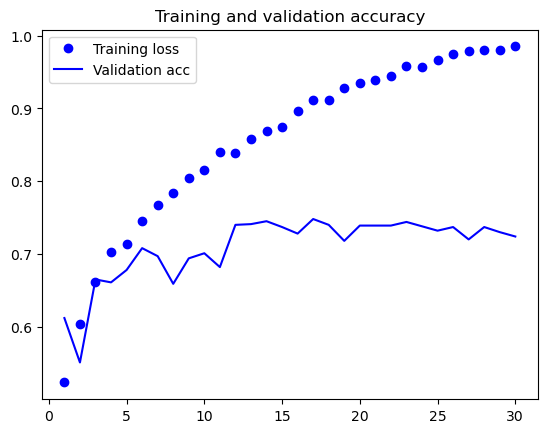

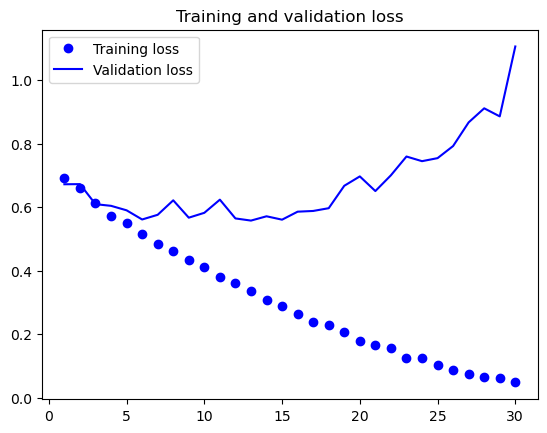

In [33]:
# § 代碼清單 5-10 繪製訓練過程中的損失曲線和精度曲線
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [34]:
#--- TEST h5 document --
import h5py

f = h5py.File('/home/earvin/workspaces/GithubProjects/tensorflow/scripts/cats_and_dogs_small_1.h5','r')
f.keys() #可以查看所有的主键
print([key for key in f.keys()])

['model_weights', 'optimizer_weights']


In [35]:
from keras.models import load_model

# 刪除既有模型變數
#del model 

# 載入模型
model = load_model('cats_and_dogs_small_1.h5')

In [36]:
# Listing 5.11 Setting up a data augmentation configuration via ImageDataGenerator
#from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [37]:
# Listing 5.12 Displaying some randomly augmented training images
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[5]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'

In [38]:
# Listing 5.13 Defining a new convnet that includes dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [39]:
# Listing 5.14 Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# 2023.12.19 hpnb好像跑不完；用ai-pc試跑看看~~
"""
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)
"""
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


/tmp/ipykernel_5613/3899751285.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 9s 79ms/step - loss: 0.6944 - acc: 0.5135 - val_loss: 0.6863 - val_acc: 0.5650


In [40]:
# Listing 5.15 Saving the model
model.save('cats_and_dogs_small_2.h5')